In [1]:
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('datascope')

In [2]:
# load the data
data = pd.read_csv('SATO_2015.csv')
data.head()

# numbers look good.
def convert_class_to_numeric(col):
    if col == 'Churned':
        returned_value = 1
    else:
        returned_value = 0
    return returned_value
df = data.copy()
df['Class'] = data['Class'].apply(convert_class_to_numeric)

In [3]:
# Do a train, test split. Let's keep 30% for testing
df_train, df_test = train_test_split(df, test_size=0.20)

In [4]:
print('lenght of training dataframe', len(df_train))
print('length of testing dataframe', len(df_test))

lenght of training dataframe 1600
length of testing dataframe 400


In [5]:
df.columns.values

array(['network_age', 'Aggregate_Total_Rev', 'Aggregate_SMS_Rev',
       'Aggregate_Data_Rev', 'Aggregate_Data_Vol', 'Aggregate_Calls',
       'Aggregate_ONNET_REV', 'Aggregate_OFFNET_REV',
       'Aggregate_complaint_count', 'aug_user_type', 'sep_user_type',
       'aug_fav_a', 'sep_fav_a', 'Class'], dtype=object)

In [6]:
df.dtypes

network_age                    int64
Aggregate_Total_Rev          float64
Aggregate_SMS_Rev            float64
Aggregate_Data_Rev           float64
Aggregate_Data_Vol           float64
Aggregate_Calls                int64
Aggregate_ONNET_REV            int64
Aggregate_OFFNET_REV           int64
Aggregate_complaint_count      int64
aug_user_type                 object
sep_user_type                 object
aug_fav_a                     object
sep_fav_a                     object
Class                          int64
dtype: object

In [7]:
# dummify
dummified = pd.get_dummies(df_train)

In [8]:
dummified_dropped = dummified.drop('Class', axis = 1)
features = dummified.drop('Class', axis = 1)

In [9]:
outcome = dummified['Class'].values

In [10]:
features = dummified.drop('Class', axis = 1)
features = features.as_matrix()


In [11]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
logreg = LogisticRegression()

scaler = StandardScaler()

In [12]:
rfe = RFE(logreg)
rfe = rfe.fit(features, outcome)
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
  True False  True  True  True  True  True  True False False  True  True
  True  True  True  True]
[12 11  8 10 15  9 14 13  7  6  5  1  1  2  1  1  1  1  1  1  3  4  1  1
  1  1  1  1]


In [13]:
np.shape(features)

(1600, 28)

In [14]:
print(len(rfe.support_))

28


In [15]:
dummified_dropped.columns.values[rfe.support_]

array(['aug_user_type_Other', 'sep_user_type_2G', 'sep_user_type_Other',
       'aug_fav_a_0', 'aug_fav_a_mobilink', 'aug_fav_a_ptcl',
       'aug_fav_a_telenor', 'aug_fav_a_ufone', 'sep_fav_a_mobilink',
       'sep_fav_a_ptcl', 'sep_fav_a_telenor', 'sep_fav_a_ufone',
       'sep_fav_a_warid', 'sep_fav_a_zong'], dtype=object)

In [16]:
sel_cols = list(dummified_dropped.columns.values[rfe.support_])
# selected = dummified[['Aggregate_complaint_count', 'aug_user_type_2G', 'aug_user_type_3G', 'aug_user_type_Other', 'sep_user_type_2G', 'sep_user_type_3G', 'sep_user_type_Other', 'aug_fav_a_0', 'aug_fav_a_mobilink', 'aug_fav_a_ptcl', 'aug_fav_a_telenor', 'aug_fav_a_ufone', 'aug_fav_a_warid', 'aug_fav_a_zong', 'sep_fav_a_mobilink', 'sep_fav_a_ptcl', 'sep_fav_a_telenor', 'sep_fav_a_ufone', 'sep_fav_a_warid', 'sep_fav_a_zong']]
selected = dummified[sel_cols]
features = selected.as_matrix()
# features

In [17]:
log_model = logreg.fit(features, outcome)
clf = RandomForestClassifier(n_jobs=2, random_state=0)
clf.fit(features,outcome)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(features,outcome)

svc = SVC()
scaler.fit(features)
svc.fit(scaler.transform(features),outcome)

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(features, outcome)

/Users/lisa/.pyenv/versions/py_360/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [18]:
# let's test

In [19]:
dummified = pd.get_dummies(df_test)
dummified_dropped = dummified.drop('Class', axis = 1)
features = dummified.drop('Class', axis = 1)
outcome = dummified['Class'].values
selected = dummified[sel_cols]
features = selected.as_matrix()



In [20]:
log_predictions = logreg.predict(features)
random_forest_predictions = clf.predict(features)
decision_tree_predictions = decision_tree.predict(features)
svc_predictions = svc.predict(scaler.transform(features))
gb_predictions = gb_classifier.predict(features)

/Users/lisa/.pyenv/versions/py_360/lib/python3.6/site-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
print('logistic regression', len(outcome[outcome == log_predictions])/len(outcome))
print('random forest', len(outcome[outcome == random_forest_predictions])/len(outcome))
print('decision tree', len(outcome[outcome == decision_tree_predictions])/len(outcome))
print('SVM', len(outcome[outcome == svc_predictions])/len(outcome)) 
print('gradient boost', len(outcome[outcome == gb_predictions])/len(outcome))

logistic regression 0.6725
random forest 0.6675
decision tree 0.67
SVM 0.6725
gradient boost 0.6725


(array([54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 79.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

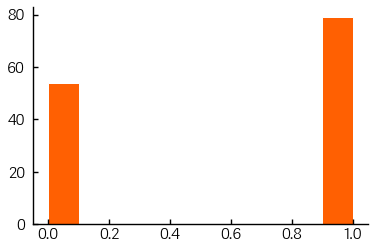

In [22]:
plt.hist(outcome[outcome != random_forest_predictions])
#We correctly predicted 200 churns

(array([54.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 79.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

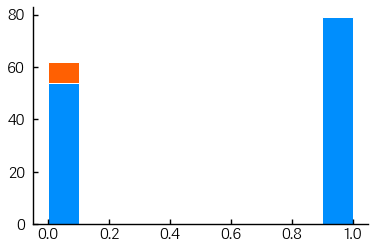

In [23]:
plt.hist(outcome[outcome != log_predictions])
plt.hist(outcome[outcome != random_forest_predictions])